# DIPA Practical 6
- Name : Aayush Shah
> Roll Number : 19BCE245

# Fourier transformation 
> Practical 6
- grey scale
- fft function

In [ ]:
import os
import cv2
import skimage
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
from google.colab.patches import cv2_imshow

In [ ]:
def display_image(title,image):
    print(title + ':')
    cv2_imshow(image)

In [ ]:
def fourier_transformation(image):
    display_image('Original Image',image)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    display_image('GrayScaled Image',grayscale_image)
    fourier_grayscale_image = np.fft.fftshift(np.fft.fft2(grayscale_image))
    display_image('Fourier Image',fourier_grayscale_image)

In [ ]:
spider_image = cv2.imread('spiderman-forever.jpeg')

Original Image:


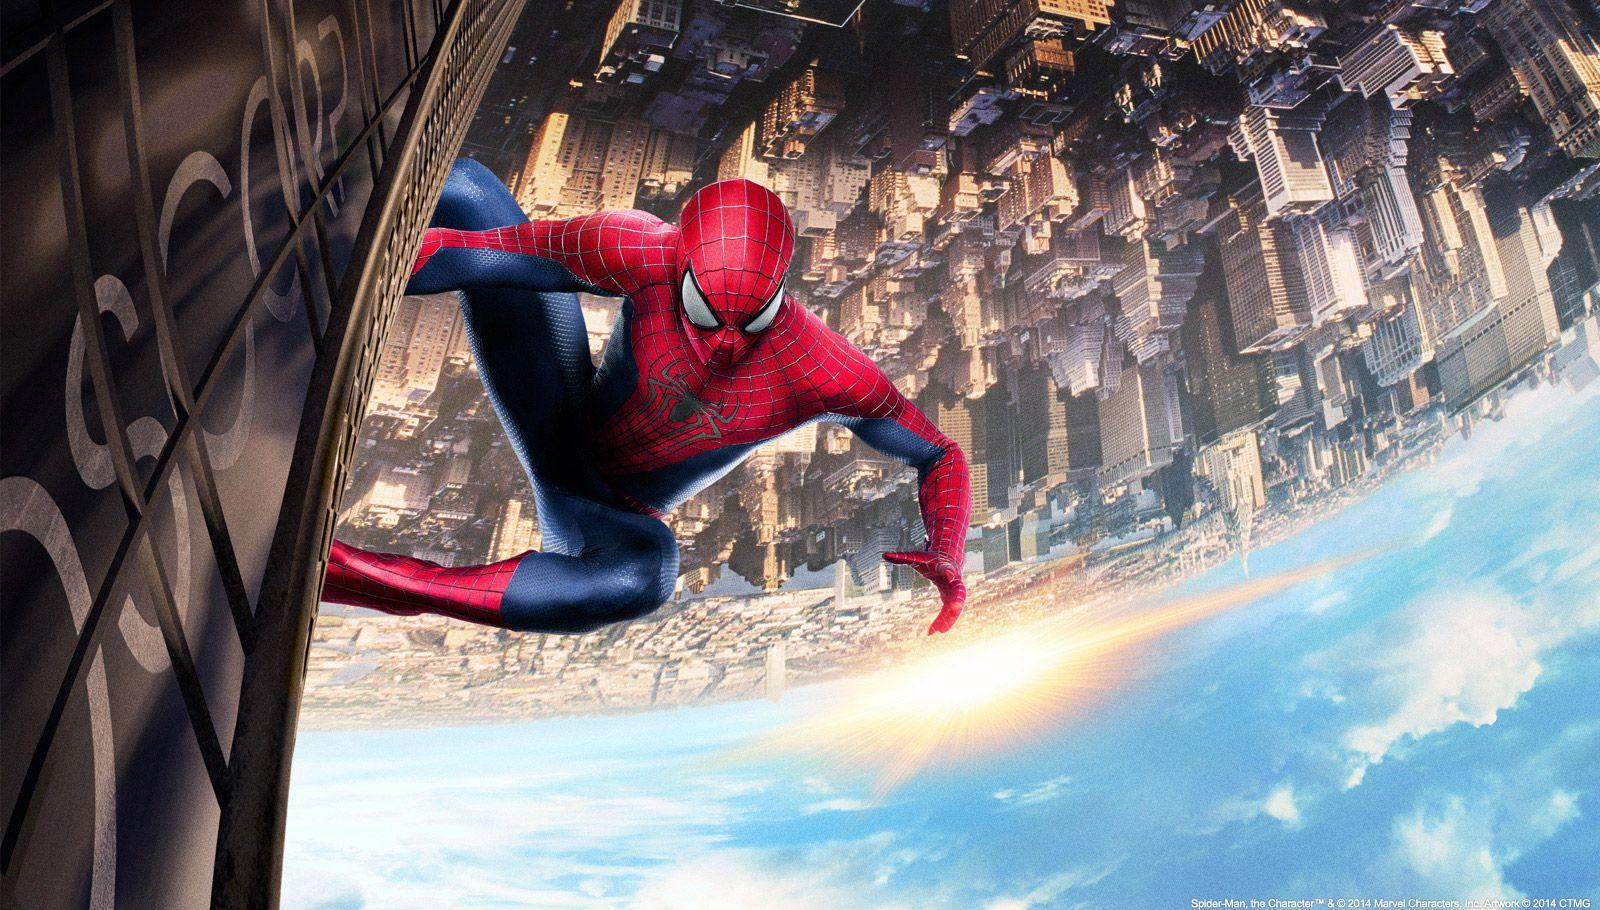

GrayScaled Image:


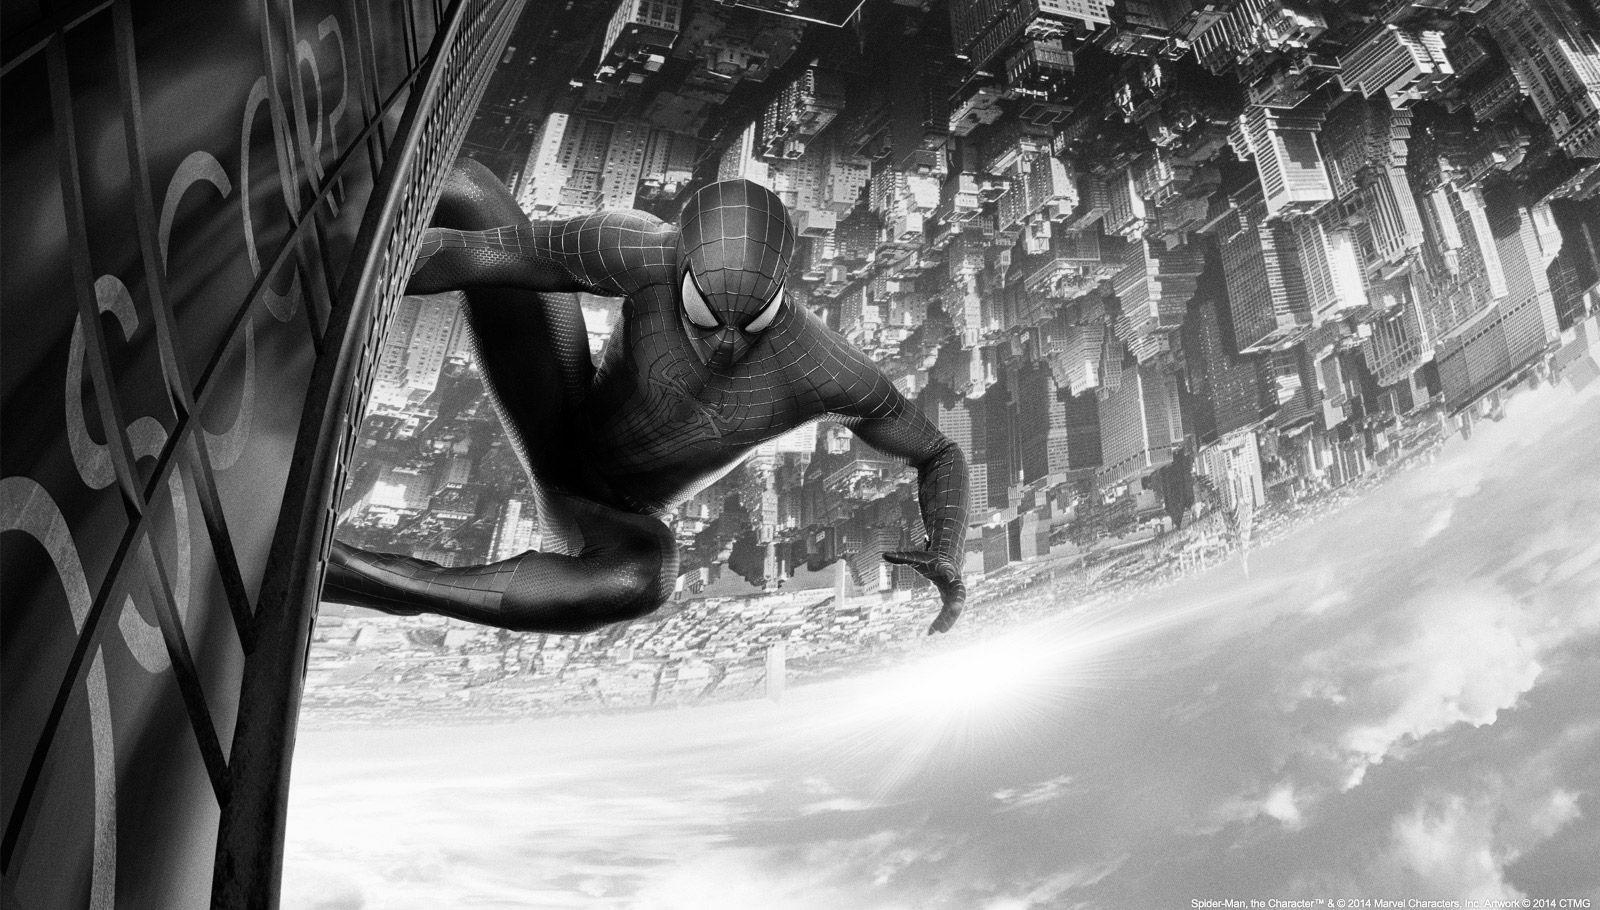

Fourier Image:


/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


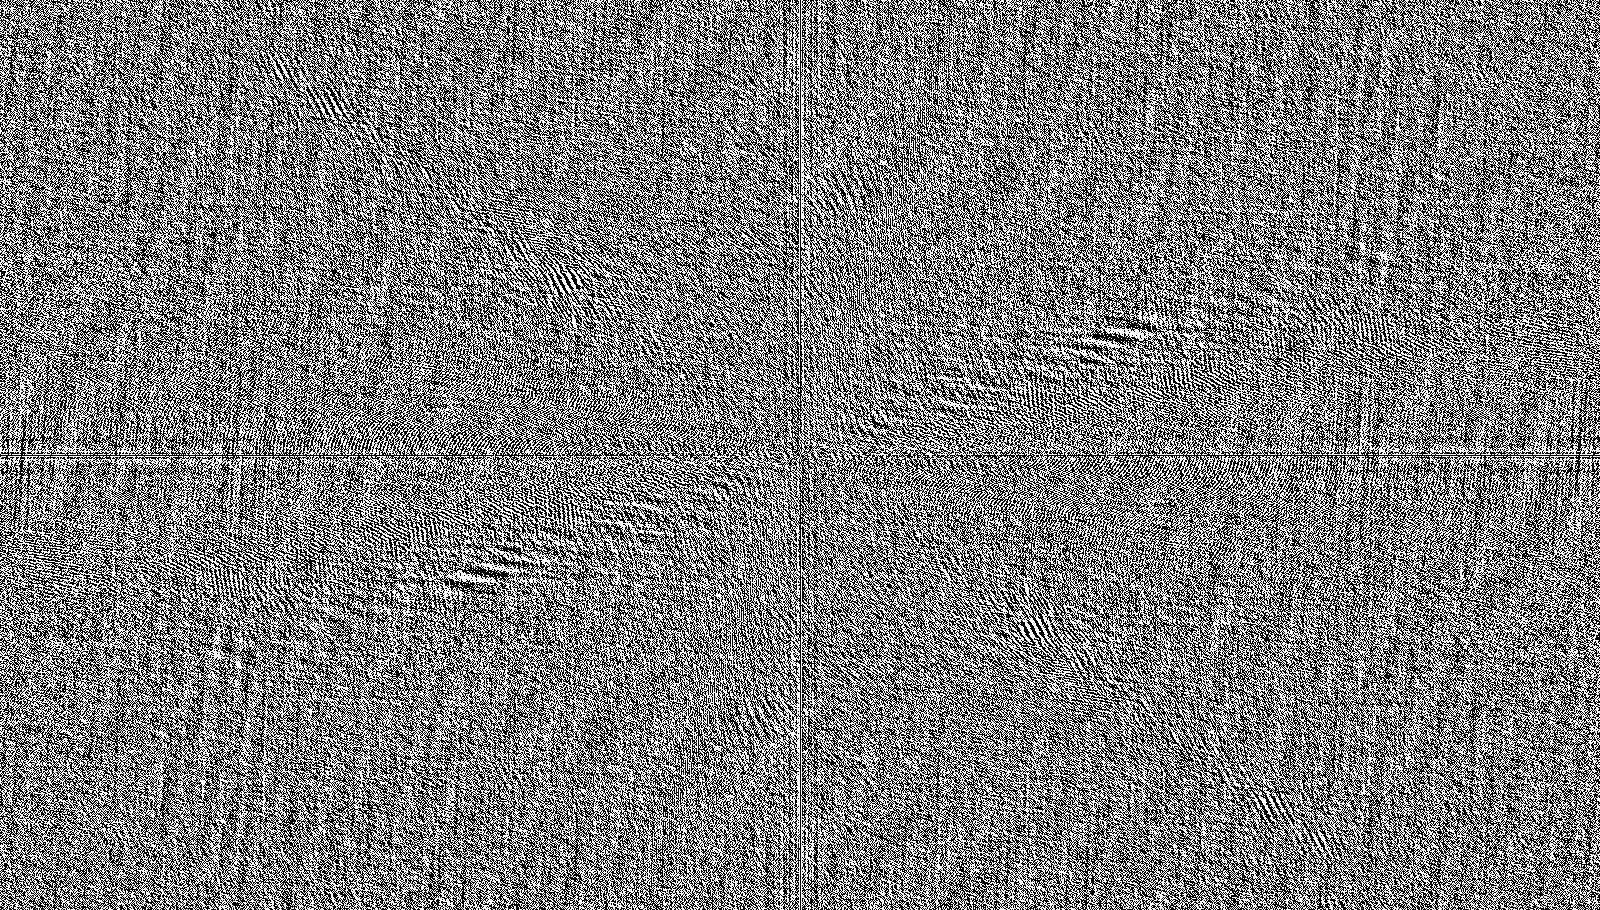

In [ ]:
fourier_transformation(spider_image)

In [ ]:
grayscale_spider_image = cv2.cvtColor(spider_image, cv2.COLOR_BGR2GRAY)
print(grayscale_spider_image)
print(grayscale_spider_image.shape)
row = grayscale_spider_image.shape[0]
col = grayscale_spider_image.shape[1]

[[ 17  14   9 ...  67  72  53]
 [ 19  14   9 ...  73  64  34]
 [ 20  14   9 ...  51  54  46]
 ...
 [ 37  22  24 ... 166 152 161]
 [ 36  21  22 ... 167 152 161]
 [ 41  25  24 ... 168 152 163]]
(910, 1600)


In [ ]:
from PIL import Image
new_image = []
for i in range(row):
    img_row = []
    for j in range(col):
        img_row.append(grayscale_spider_image[i,j]*pow(-1,i+j))
    new_image.append(img_row)
np_img = np.array(new_image)
img = Image.fromarray(np_img, 'L')

:


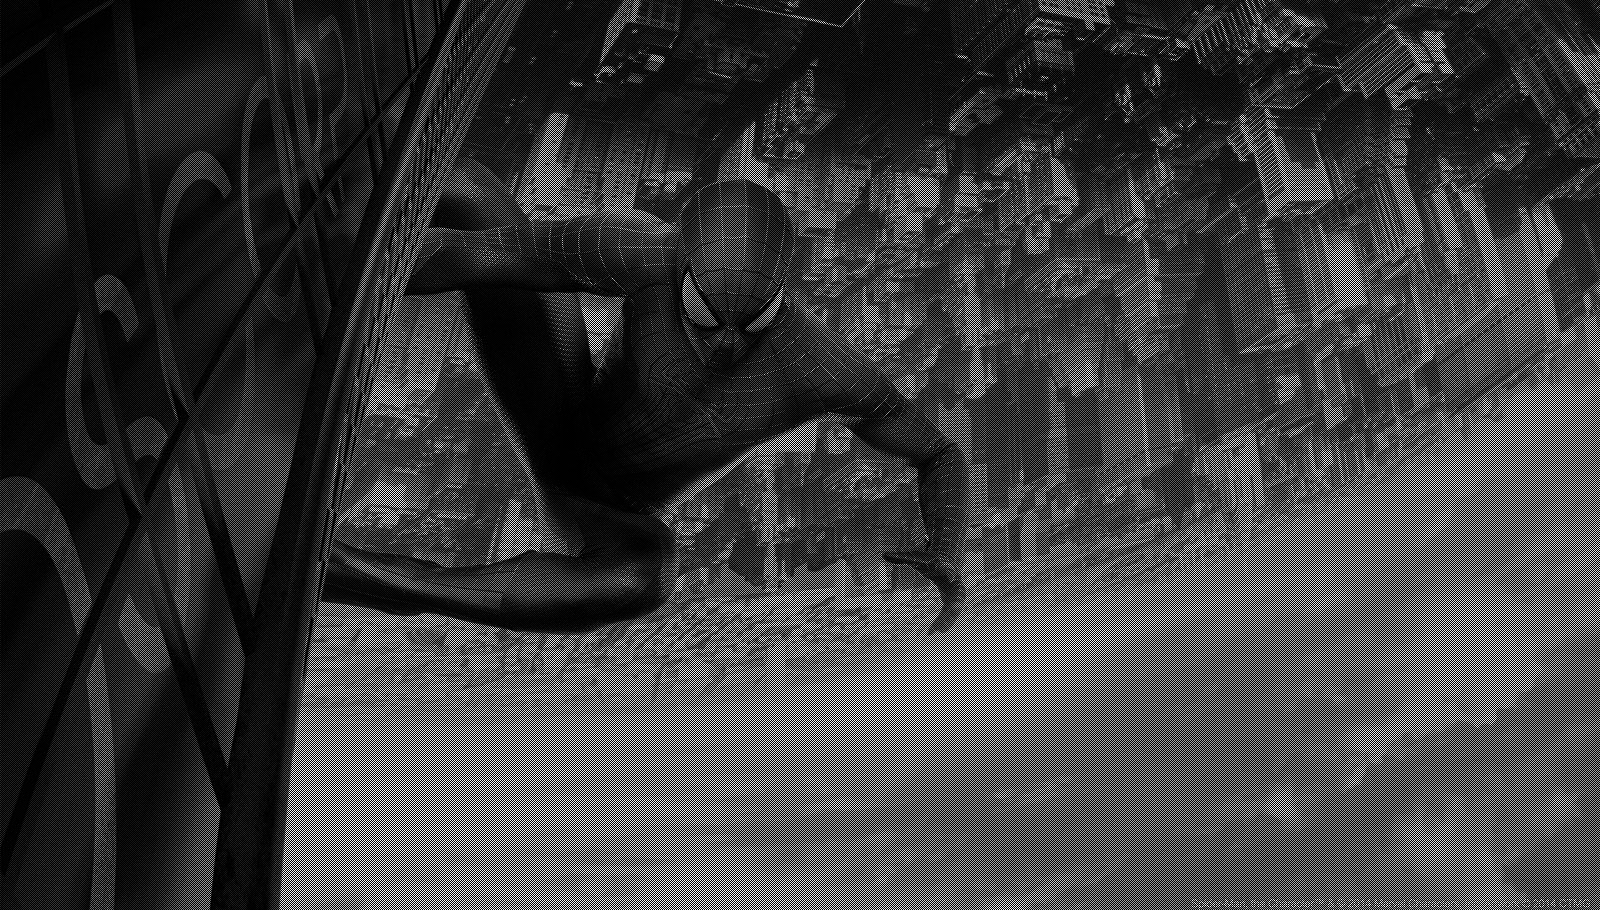

In [ ]:
display_image('',np_img)

In [ ]:
fi = np.fft.fft2(np_img)

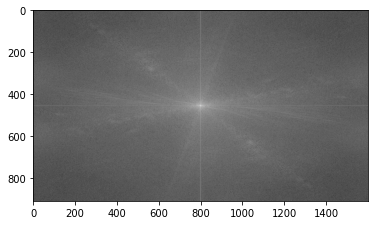

In [ ]:
plt.imshow(np.log(abs(fi)), cmap="gray")

In [ ]:
np_img.shape

(910, 1600)

In [ ]:
import math
row_half = np_img.shape[0]
col_half = np_img.shape[1]
r = 100
mask = np.zeros(fi.shape)
for i in range(0, row_half):
  for j in range(0, col_half):
    if(math.sqrt(((i-row_half)**2) + ((j-col_half)**2))<r):
      mask[i][j] = 1

In [ ]:
ffi = np.zeros(fi.shape)
ffi = ffi.astype('complex')

for i in range(0, fi.shape[0]):
  for j in range(0, fi.shape[1]):
    if(mask[i][j]==1):
      ffi[i][j] = fi[i][j]
    else:
      ffi[i][j] = complex(0,0)

In [ ]:
inverse_ffi = np.fft.ifft2(ffi)

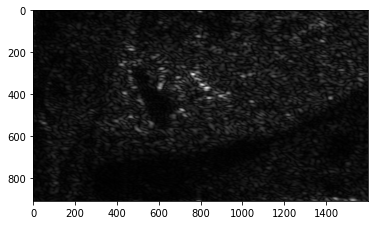

In [ ]:
plt.imshow(abs(inverse_ffi), cmap="gray")

---

In [ ]:
afi = abs(fi)

In [ ]:
inv = np.fft.ifft2(fi)

fi:


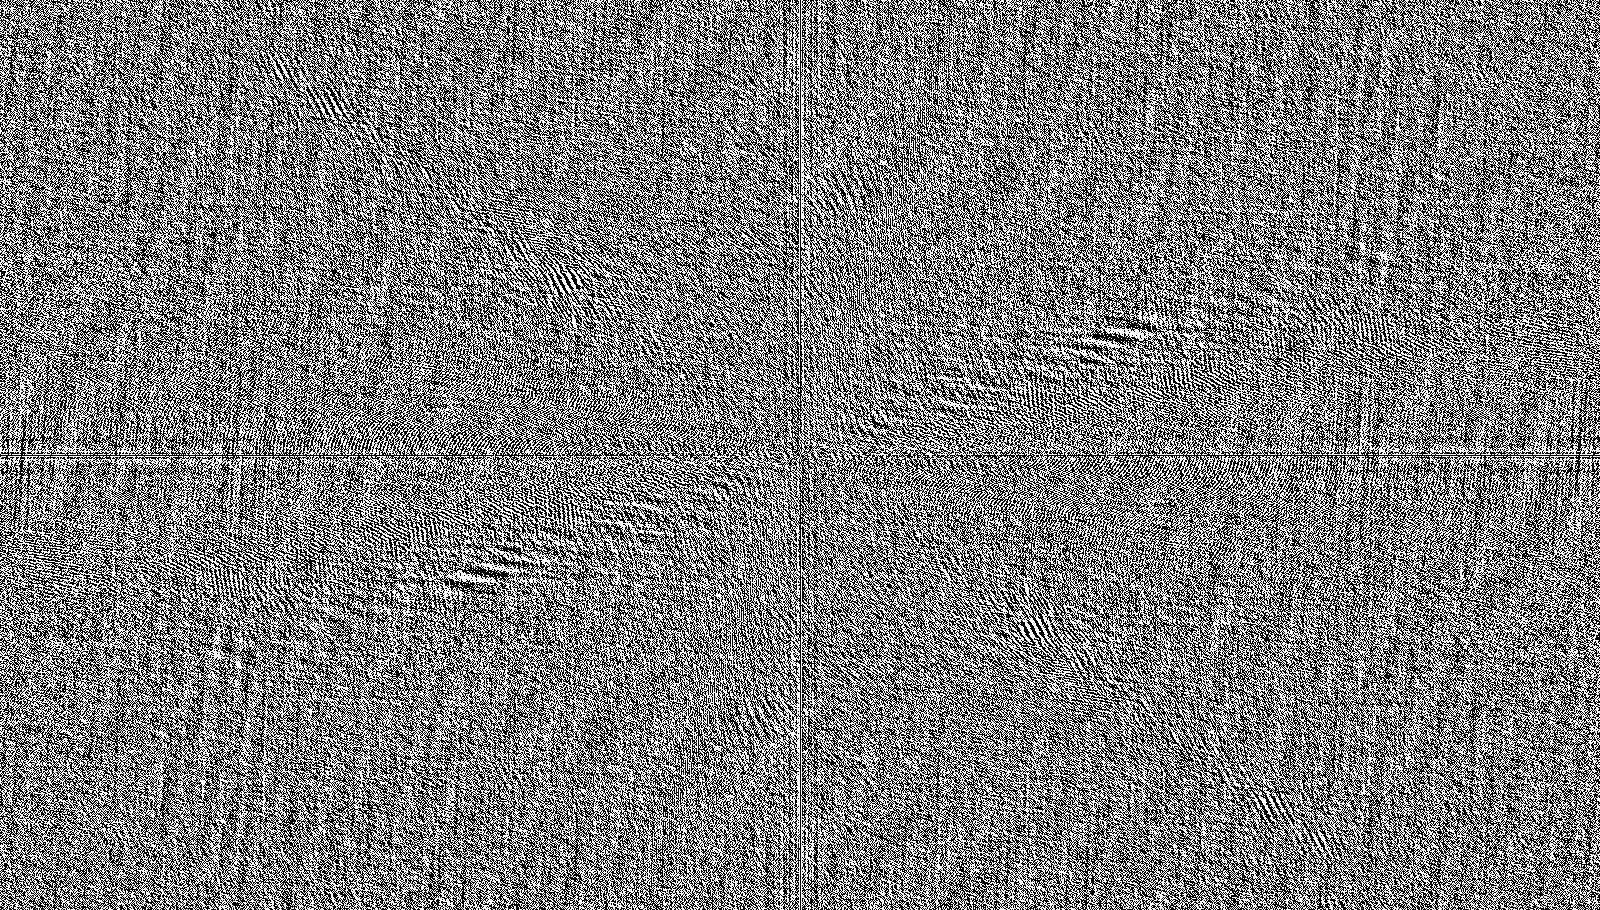

In [ ]:
display_image('fi',fi)

inv fi:


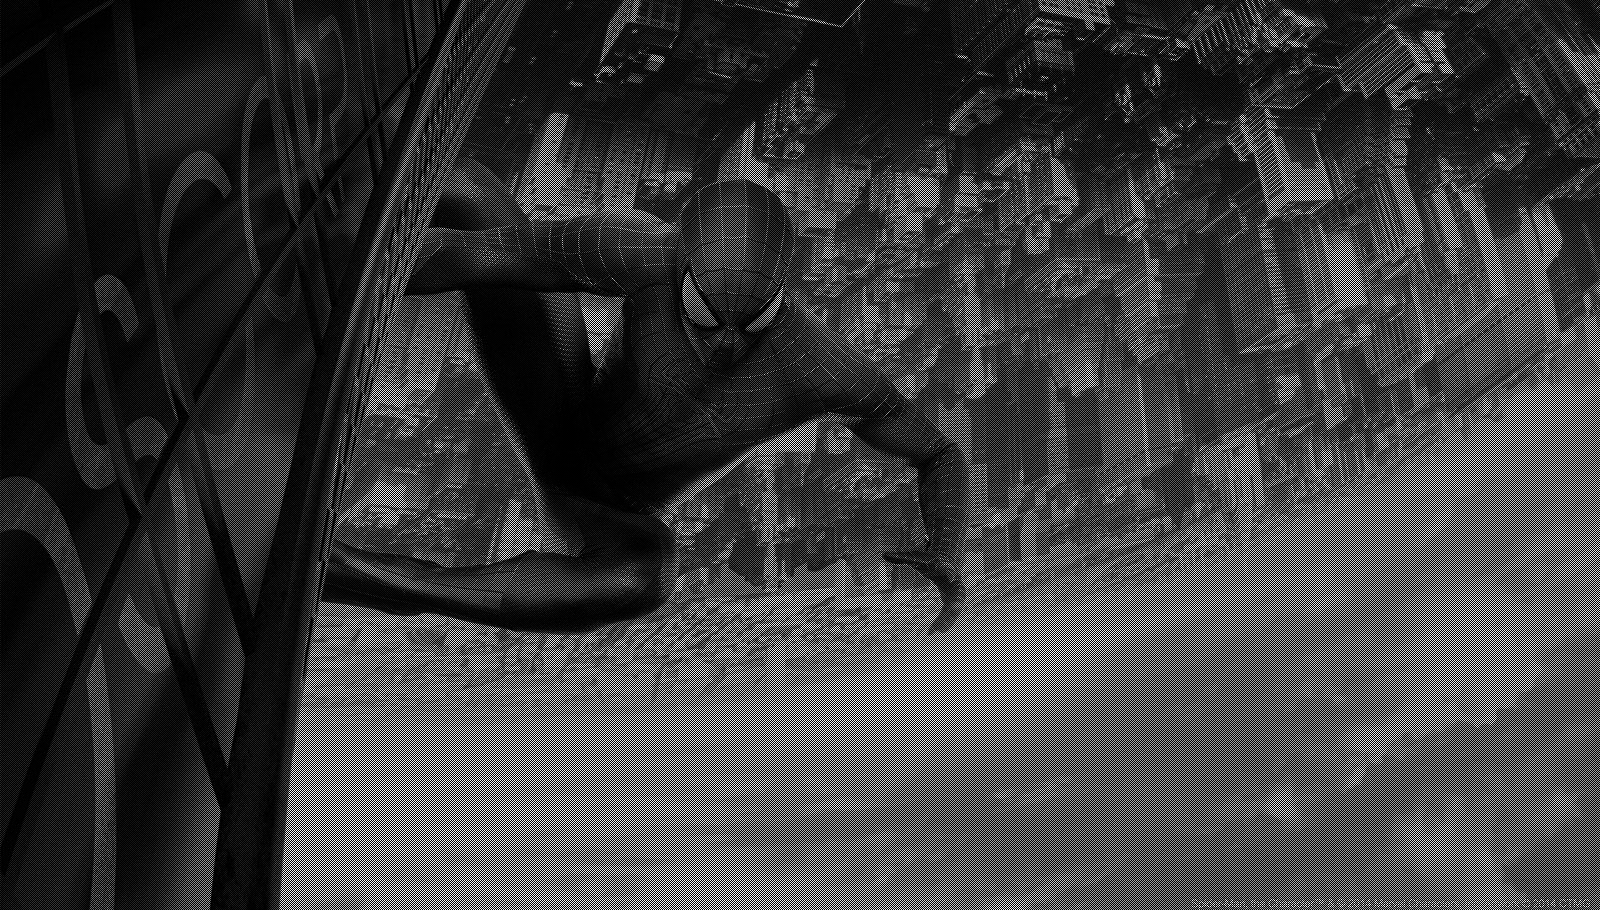

In [ ]:
display_image('inv fi',inv)

# Gausian filter

In [ ]:
gaussian_mask = np.zeros(fi.shape)

r = 20
a = float(spider_image.shape[0]/2)
b = float(spider_image.shape[1]/2)
for i in range(0, spider_image.shape[0]):
  for j in range(0, spider_image.shape[1]):
    d = math.sqrt(((i-a)**2) + ((j-b)**2))
    gaussian_mask[i][j] = 1-((math.e)**( ((-1)*d*d) / (2*r*r)))    

In [ ]:
gffi = np.zeros(fi.shape)
gffi = ffi.astype('complex')

for i in range(0, fi.shape[0]):
  for j in range(0, fi.shape[1]):
    gffi[i][j] = fi[i][j] * gaussian_mask[i][j]

g_inverse_ffi = np.fft.ifft2(gffi)

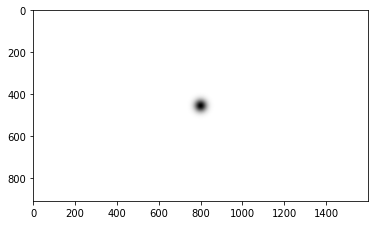

In [ ]:
plt.imshow(gaussian_mask, cmap="gray")

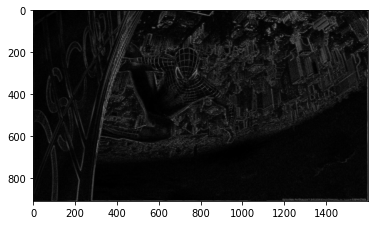

In [ ]:
plt.imshow(abs(g_inverse_ffi), cmap="gray")

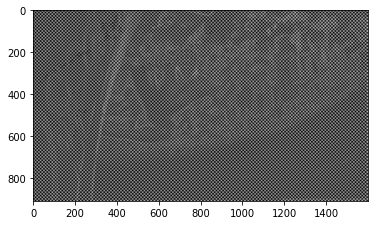

In [ ]:
plt.imshow(abs(g_inverse_ffi)+img, cmap ="gray")

# ButterWorth Mask

In [ ]:
butworth_mask = np.zeros(fi.shape)

r = 100
n = 10
a = float(spider_image.shape[0]/2)
b = float(spider_image.shape[1]/2)
for i in range(0, spider_image.shape[0]):
  for j in range(0, spider_image.shape[1]):
    d = math.sqrt(((i-a)**2) + ((j-b)**2))
    if d==0:
      continue
    butworth_mask[i][j] = 1/(1+(r/d)**(2*n))

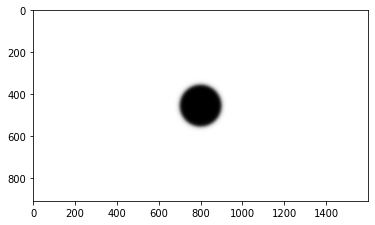

In [ ]:
plt.imshow(butworth_mask, cmap="gray")

In [ ]:
bffi = np.zeros(fi.shape)
bffi = ffi.astype('complex')

for i in range(0, fi.shape[0]):
  for j in range(0, fi.shape[1]):
    bffi[i][j] = fi[i][j] * butworth_mask[i][j]

In [ ]:
b_inverse_ffi = np.fft.ifft2(bffi)

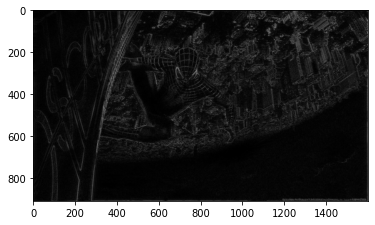

In [ ]:
plt.imshow(abs(b_inverse_ffi), cmap="gray")

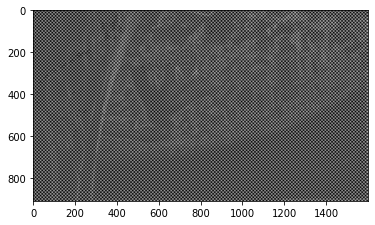

In [ ]:
plt.imshow(abs(b_inverse_ffi)+img, cmap ="gray")

# Median filter

In [ ]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

In [ ]:
spider_img_for_median_filter = Image.open("spiderman-forever.jpeg").convert(
        "L")
arr = np.array(spider_img_for_median_filter)
removed_noise = median_filter(arr, 3) 
sp_img = Image.fromarray(removed_noise)
sp_img.show() # display_image('median filter applied',sp_img) 